In [ ]:
import tensorflow as tf

print(tf.__version__)

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 1

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

model.compile(optimizer = tf.optimizers.Adam(),#optimizer = 'adam'
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.88): # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


# Shallow NN

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

# CNN

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),    #CNN 사용
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


# W3

### load data

In [ ]:
# grader-required-cell

# Load the data

# Get current working directory
current_dir = os.getcwd()

# Append data/mnist.npz to the previous path to get the full path
data_path = os.path.join(current_dir, "data/mnist.npz")

# Get only training set
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path=data_path)


### preprocessing

In [ ]:
# GRADED FUNCTION: reshape_and_normalize

def reshape_and_normalize(images):

    ### START CODE HERE

    # Reshape the images to add an extra dimension
    images = images.reshape((-1, images.shape[1], images.shape[2], 1))
    #images=np.expand_dims(images,axis=-1)

    # Normalize pixel values
    images = images / 255.0

    ### END CODE HERE

    return images

# Reload the images in case you run this cell multiple times
(training_images, _), _ = tf.keras.datasets.mnist.load_data(path=data_path)

# Apply your function
training_images = reshape_and_normalize(training_images)

print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")

# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.995): #accuacy 99.5%이상일 경우 종료
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

### END CODE HERE


In [ ]:
# grader-required-cell

# GRADED FUNCTION: convolutional_model
def convolutional_model():
    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      # Add the same layers as before
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    ### END CODE HERE

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# grader-required-cell

# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it '
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

# W4
### Image Generator

In [ ]:
import os
import tensorflow as tf

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = '/content/' + fn
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    if classes[0]>0.5:
    print(fn + " is a human")
    else:
    print(fn + " is a horse")


In [ ]:
#+validation set
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = '/content/' + fn
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")


In [ ]:
# compacted image
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

In [ ]:
# grader-required-cell

from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

# grader-required-cell

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True
            
# grader-required-cell

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
def image_generator():
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/happy_and_sad_files",
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

    return train_generator
# Save your generator in a variable
gen = image_generator()

from tensorflow.keras import optimizers, losses
import tensorflow as tf

# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model(train_generator):

    callbacks = myCallback()

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    model.compile(loss=losses.binary_crossentropy,
                  optimizer=optimizers.RMSprop(lr=0.001),
                  metrics=['accuracy'])

    # Train the model
    # Your model should achieve the desired accuracy in less than 15 epochs.
    # You can hardcode up to 20 epochs in the function below but the callback should trigger before 15.
    history = model.fit(x=train_generator,
                        epochs=20,
                        callbacks=[callbacks])
    return history

hist = train_happy_sad_model(gen)

# C1_W1_Lab_1_hello_world_nn

### Imports

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

### Define & Compile NN

In [3]:
# Build a simple Sequential model
# Sequential 층을 선형으로 쌓아 구성된 신경망, Dense fully connected layer
# units 층에 있는 뉴런의 수, input_shape 입력 데이터의 형태
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
# Compile the model 모델이 학습될 준비를 하는 것
model.compile(optimizer='sgd', loss='mean_squared_error')

NameError: name 'tf' is not defined

### Providing Data

In [ ]:
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

### Training NN

In [ ]:
# Train the model 실제 학습
# xs 입력데이터, ys 출력데이터
model.fit(xs, ys, epochs=500)
# Make a prediction
print(model.predict([10.0]))

# C1_W1_Assingment

### Housing Prices

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

def house_model():
    ### START CODE HERE

    # Define input and output tensors with the values for houses with 1 up to 6 bedrooms
    # Hint: Remember to explictly set the dtype as float
    xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float) #화장실 개수
    ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)  #가격

    # Define your model (should be a model with 1 dense layer and 1 unit)
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

    # Compile your model
    # Set the optimizer to Stochastic Gradient Descent
    # and use Mean Squared Error as the loss function
    model.compile(optimizer='sgd', loss='mean_squared_error')

    # Train your model for 1000 epochs by feeding the i/o tensors
    model.fit(xs, ys, epochs=1000)

    ### END CODE HERE
    return model

# Get your trained model
model = house_model()

#예측하고자 하는 새로운 데이터
new_x = 7.0
prediction = model.predict([new_x])[0]
print(prediction)

Epoch 1/1000
1/1 [==============================] - 0s 495ms/step - loss: 11.6317
Epoch 2/1000
1/1 [==============================] - 0s 47ms/step - loss: 5.4325
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.5630
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.2345
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6193
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.3342
Epoch 7/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2019
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1404
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1115
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0978
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0912
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0877
Epoch 13/1000
1/1 [======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0439
Epoch 104/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0435
Epoch 105/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0432
Epoch 106/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0429
Epoch 107/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0426
Epoch 108/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0423
Epoch 109/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0420
Epoch 110/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0417
Epoch 111/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0414
Epoch 112/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0411
Epoch 113/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0408
Epoch 114/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0405
Epoch 115/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 205/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 206/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 207/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0205
Epoch 208/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 209/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0202
Epoch 210/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 211/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0199
Epoch 212/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 213/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0196
Epoch 214/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 215/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 216/1000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 306/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 307/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 308/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 309/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 310/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 311/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 312/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 313/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 314/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 315/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 316/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 317/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 407/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 408/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 409/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 410/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 411/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 412/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 413/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 414/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 415/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 416/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 417/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 418/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 508/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 509/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 510/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 511/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 512/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 513/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 514/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 515/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 516/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 517/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 518/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 519/1000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 609/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 610/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 611/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 612/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 613/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 614/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 615/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 616/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 617/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 618/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 619/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 620/1000
1/1 [======================

1/1 [==============================] - 0s 3ms/step - loss: 5.3752e-04
Epoch 706/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.3360e-04
Epoch 707/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.2972e-04
Epoch 708/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.2586e-04
Epoch 709/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.2202e-04
Epoch 710/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.1822e-04
Epoch 711/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.1445e-04
Epoch 712/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.1070e-04
Epoch 713/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.0698e-04
Epoch 714/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.0328e-04
Epoch 715/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.9961e-04
Epoch 716/1000
1/1 [==============================] - 0s 5ms/step - loss: 4.9597

1/1 [==============================] - 0s 3ms/step - loss: 2.6640e-04
Epoch 802/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.6446e-04
Epoch 803/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.6253e-04
Epoch 804/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.6062e-04
Epoch 805/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.5872e-04
Epoch 806/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.5684e-04
Epoch 807/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.5496e-04
Epoch 808/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.5311e-04
Epoch 809/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.5126e-04
Epoch 810/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.4943e-04
Epoch 811/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.4761e-04
Epoch 812/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.4581

1/1 [==============================] - 0s 3ms/step - loss: 1.3203e-04
Epoch 898/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.3107e-04
Epoch 899/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.3011e-04
Epoch 900/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.2916e-04
Epoch 901/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.2822e-04
Epoch 902/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.2729e-04
Epoch 903/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.2636e-04
Epoch 904/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.2544e-04
Epoch 905/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.2453e-04
Epoch 906/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.2362e-04
Epoch 907/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.2272e-04
Epoch 908/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.2183

1/1 [==============================] - 0s 3ms/step - loss: 6.5435e-05
Epoch 994/1000
1/1 [==============================] - 0s 4ms/step - loss: 6.4958e-05
Epoch 995/1000
1/1 [==============================] - 0s 4ms/step - loss: 6.4485e-05
Epoch 996/1000
1/1 [==============================] - 0s 4ms/step - loss: 6.4015e-05
Epoch 997/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.3549e-05
Epoch 998/1000
1/1 [==============================] - 0s 4ms/step - loss: 6.3086e-05
Epoch 999/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.2626e-05
Epoch 1000/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.2170e-05


# C1_W2_Lab_1_beyond_hello_world

In [ ]:
import tensorflow as tf

print(tf.__version__)

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

# Load the training and test set the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here, 출력할 이미지 인덱스
index = 1

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Build the classification model
model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

NameError: name 'training_labels' is not defined

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

### Ex1

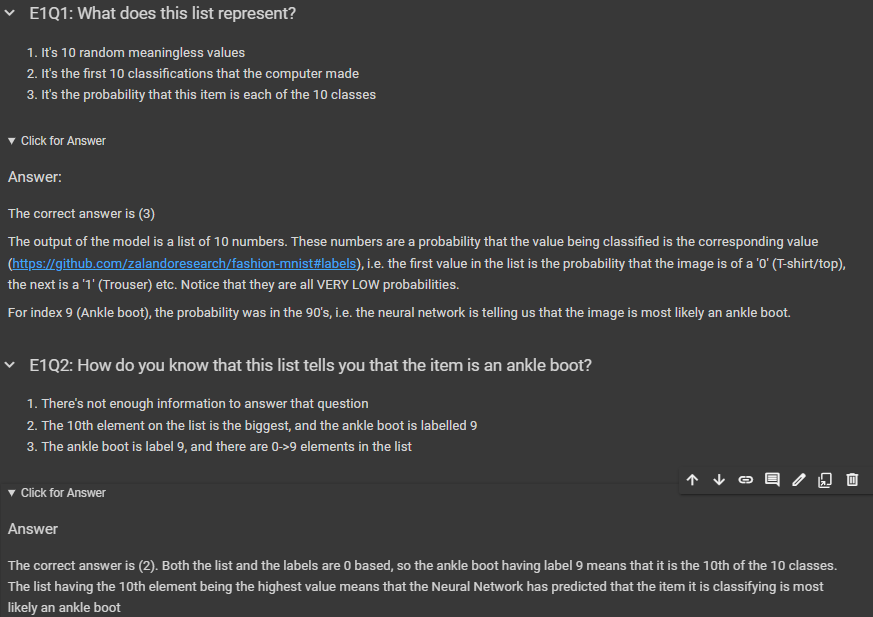

### Ex2

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

### Ex8

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.88): # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


# C1_W2_Assignment

### Callback()

In [ ]:
### START CODE HERE

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.99): # Experiment with changing this value
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

### END CODE HERE

In [ ]:
# GRADED FUNCTION: train_mnist
def train_mnist(x_train, y_train):

    ### START CODE HERE

    # Instantiate the callback class
    callbacks = myCallback()

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    ### END CODE HERE

    return history

# C1_W3_Lab_1_improving_accuracy_using convolutions

### Shallow NN(앝은 신경망:은닉층의 수가 적거나 뉴런수가 적은 것)

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),    #CNN 사용
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5) #epoch 5

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


1. 컨볼루션의 필터 수를 변경하면 모델의 파라미터 수와 학습 시간이 변할 수 있습니다. 예를 들어, 필터 수를 줄이면 학습할 파라미터 수가 감소하므로 학습 시간이 줄어들 수 있습니다. 그러나 모델의 표현력은 줄어들 수 있으므로 정확도에 영향을 줄 수 있습니다.

2. 마지막 컨볼루션을 제거하면 모델의 특징 추출 능력이 감소할 수 있습니다. 따라서 모델의 정확도가 감소할 수 있습니다. 학습 시간에는 큰 변화가 없을 수 있습니다.

3. 추가적인 컨볼루션을 추가하면 모델이 더 많은 이미지 특징을 학습할 수 있습니다. 그러나 추가된 컨볼루션은 더 많은 파라미터를 가지므로 모델의 복잡도가 증가하고 학습 시간이 증가할 수 있습니다. 이는 정확도를 향상시킬 수 있지만 과적합의 가능성도 증가시킬 수 있습니다.

4. 모든 컨볼루션을 제거하면 모델이 이미지의 공간적 구조를 고려하지 않고 전역적인 특징만을 학습할 수 있습니다. 따라서 모델의 표현 능력이 제한되어 정확도가 감소할 수 있습니다.

5. 이전 레슨에서 구현한 콜백을 사용하여 특정 손실 값에 도달하면 훈련을 중지할 수 있습니다. 콜백은 특정 조건이 충족될 때 호출되고, 여기서는 손실 값이 일정 수준 이하로 떨어질 때 훈련을 중지시키도록 구현할 수 있습니다.

### 컨볼루션의 필터 수 변경하기: 컨볼루션 레이어의 필터 수를 16 또는 64로 변경하여 정확도와 학습 시간에 어떤 영향을 미치는지 살펴봅니다.

In [ ]:
# 첫 번째 Conv2D 레이어의 필터 수를 16으로 변경
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### 컨볼루션 레이어에서 필터 수를 변경하는 것은 모델의 복잡성과 표현 능력을 조절하는 중요한 요소입니다. 필터 수를 줄이면 모델의 파라미터 수가 감소하고, 더 많은 픽셀 수를 고려하여 더 많은 특징을 추출할 수 있습니다. 그러나 필터 수를 늘리면 모델이 더 많은 특징을 학습할 수 있지만, 학습 시간이 늘어날 수 있습니다.

### 마지막 컨볼루션 제거하기: 마지막 컨볼루션 레이어를 제거하여 정확도와 학습 시간에 어떤 영향을 미치는지 확인합니다.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 마지막 컨볼루션 레이어 제거
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### 마지막 컨볼루션 레이어를 제거하면 모델이 더 간단해질 것으로 예상됩니다. 이 레이어가 이미지의 공간적인 특징을 더 깊이 추출하는 데 도움을 주기는 하지만, 제거함으로써 모델이 학습할 파라미터 수가 감소하고 모델의 복잡성이 줄어들 것으로 예상됩니다. 따라서 학습 시간이 줄어들 수 있지만, 모델의 표현력이 줄어들어 정확도에 영향을 줄 수도 있습니다.

### 더 많은 컨볼루션 추가하기: 추가적인 컨볼루션 레이어를 추가하여 정확도와 학습 시간에 어떤 영향을 미치는지 실험합니다.

In [ ]:
# 추가적인 Conv2D 레이어를 추가
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),  # 추가된 Conv2D 레이어
    tf.keras.layers.MaxPooling2D(2,2),  # 추가된 MaxPooling2D 레이어
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### 추가된 컨볼루션 레이어는 입력 이미지의 다양한 특징을 추출하고, 이를 통해 모델이 데이터를 더 잘 이해하고 분류할 수 있습니다. 그러나 더 많은 컨볼루션 레이어를 추가할 경우 모델의 파라미터 수와 학습 시간이 증가할 수 있으며, 과적합의 위험이 높아질 수도 있습니다.

### 모든 컨볼루션 제거하기: 모든 컨볼루션 레이어를 제거하여 정확도와 학습 시간에 어떤 영향을 미치는지 확인합니다.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),  # 첫 번째 컨볼루션 레이어만 사용
    tf.keras.layers.MaxPooling2D(2, 2),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

##### 모델의 표현 능력이 제한될 것으로 예상됩니다. 모델은 이미지의 전역적인 패턴을 파악하고 분류하는 데 어려움을 겪을 수 있으며, 이로 인해 정확도가 감소할 수 있습니다.

### 콜백 구현하기: 손실 함수를 모니터링하여 특정 임계값 이하가 될 때 훈련을 중지시키는 콜백을 구현합니다.

In [ ]:
# 손실이 특정 값 이하로 떨어지면 훈련을 중지하는 콜백 클래스 정의
class LossCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.1:  # 특정 임계값 이하로 손실이 떨어지면
            print("\nReached loss less than 0.1, so cancelling training!")
            self.model.stop_training = True

# 콜백을 사용하여 모델 훈련
model.fit(training_images, training_labels, epochs=10, callbacks=[LossCallback()])

# C1_W3_Assignment

### Improve MNIST with Convolutions

In [ ]:
# grader-required-cell

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

# grader-required-cell

# Load the data

# Get current working directory
current_dir = os.getcwd()

# Append data/mnist.npz to the previous path to get the full path
data_path = os.path.join(current_dir, "mnist.npz")

# Get only training set(붙여서 사용할것)
(training_images, training_labels), _ 
= tf.keras.datasets.mnist.load_data(path=data_path)

In [ ]:
# GRADED FUNCTION: reshape_and_normalize

def reshape_and_normalize(images):

    ### START CODE HERE

    # Reshape the images to add an extra dimension
    images = np.expand_dims(images, axis=-1)
    #axis 매개 변수에는 몇 가지 옵션이 있습니다:
    #None 또는 -1: 배열의 마지막 축에 새로운 축을 추가합니다.
    #0: 배열의 첫 번째 축에 새로운 축을 추가합니다.
    #1: 배열의 두 번째 축에 새로운 축을 추가합니다.
    #그 외의 다른 양수 또는 음수 값: 해당 인덱스에 새로운 축을 추가합니다.

    # Normalize pixel values
    images = images / 255.0

    ### END CODE HERE

    return images

In [ ]:
# grader-required-cell

# Reload the images in case you run this cell multiple times
(training_images, _), _ = tf.keras.datasets.mnist.load_data(path=data_path)

# Apply your function
training_images = reshape_and_normalize(training_images)

print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")

In [ ]:
# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.995): #accuacy 99.5%이상일 경우 종료
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

### END CODE HERE

In [ ]:
# GRADED FUNCTION: convolutional_model
def convolutional_model():
    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      # Add the same layers as before
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    ### END CODE HERE

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# grader-required-cell

# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it '
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

print(f"Your model was trained for {len(history.epoch)} epochs")

if not "accuracy" in history.model.metrics_names:
    print("Use 'accuracy' as metric when compiling your model.")
else:
    print("The metric was correctly defined.")

# C1_W4_Lab_1_image_generator_no_validation

In [ ]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [ ]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


#### make model

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 
    # with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. 
    # It will contain a value from 0-1 
    # where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

### Prediction

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
    path = '/content/' + fn
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    if classes[0]>0.5:
    print(fn + " is a human")
    else:
    print(fn + " is a horse")

# C1_W4_Lab_2_with_validation

In [ ]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

#### 나머지는 Lab1과 동일

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

# C1_W4_Lab_3_compacted_images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        #이미지 사이즈 조정    
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

#### 작은 이미지를 사용하면 학습 및 검증 시간이 감소할 수 있지만, 모델이 이미지의 일부 정보를 잃을 수 있습니다. 따라서 target_size를 변경하면 학습 및 검증 시의 모델 성능에 영향을 미칠 수 있습니다.

# C1_W4_Assignment

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img

happy_dir = "/content/drive/MyDrive/happy_and_sad_files/happy_files"
sad_dir = "/content/drive/MyDrive/happy_and_sad_files/sad_files"

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
# grader-required-cell

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
def image_generator():
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(directory="happy_and_sad_files",
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

    return train_generator

# Save your generator in a variable
gen = image_generator()

In [ ]:
from tensorflow.keras import optimizers, losses
import tensorflow as tf

# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model(train_generator):

    # Instantiate the callback
    callbacks = myCallback()

    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    model.compile(loss=losses.binary_crossentropy,
                  optimizer=optimizers.RMSprop(lr=0.001),
                  metrics=['accuracy'])

    # Train the model
    # Your model should achieve the desired accuracy in less than 15 epochs.
    # You can hardcode up to 20 epochs in the function below but the callback should trigger before 15.
    history = model.fit(x=train_generator,
                        epochs=20,
                        callbacks=[callbacks])
    ### END CODE HERE
    return history

hist = train_happy_sad_model(gen)